In [1]:
# Configuration
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

In [2]:
# Load the data
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
data

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,Female,18.0,Ahmedabad,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,140696,Lata,Female,41.0,Hyderabad,Working Professional,Content Writer,NaN,5.0,NaN,NaN,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,NaN,3.0,NaN,NaN,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0
140698,140698,Prachi,Female,49.0,Srinagar,Working Professional,Plumber,NaN,5.0,NaN,NaN,2.0,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0


In [3]:
# Summary Statistics
data.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


In [4]:
#Data Structure

# Overview of columns, data types, and missing values
data.info()

# Display basic statistics for numerical columns
data.describe()

# Display the shape of the DataFrame (rows, columns)
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

(140700, 20)

In [5]:
#Missing Values Analysis

missing_values = data.isnull().sum()
print(missing_values)

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64


In [6]:
# Filter the rows where 'Working Professional or Student' is 'Working Professional'
working_professionals = data[data['Working Professional or Student'] == 'Working Professional']

# Count the number of missing values in the 'Profession' column
missing_profession_count = working_professionals['Profession'].isna().sum()

# Output the result
print(f"Number of missing values in the 'Profession' column for 'Working Professional': {missing_profession_count}")


Number of missing values in the 'Profession' column for 'Working Professional': 8763


In [7]:
# Calculate the mode of the 'Profession' column
profession_mode = data['Profession'].mode()

# Output the result
if not profession_mode.empty:
    print(f"Mode of the 'Profession' column: {profession_mode[0]}")
else:
    print("The 'Profession' column has no mode (all values are NaN or unique).")


Mode of the 'Profession' column: Teacher


In [8]:
# Fill 'Profession' with 'Student' where 'Working Professional or Student' is 'Student' and 'Profession' is NaN
data.loc[(data['Working Professional or Student'] == 'Student') & data['Profession'].isna(), 'Profession'] = 'Student'

# Fill 'Profession' with 'Teacher' where 'Working Professional or Student' is 'Working Professional' and 'Profession' is NaN
data.loc[(data['Working Professional or Student'] == 'Working Professional') & data['Profession'].isna(), 'Profession'] = 'Teacher'


# Output the result to confirm the changes
print(f"Number of missing values in 'Profession' after filling: {data['Profession'].isna().sum()}")


Number of missing values in 'Profession' after filling: 0


In [9]:
# Check distinct city names
distinct_cities = data['City'].unique() 
print(distinct_cities)

# Count the number of distinct city names
num_cities = data['City'].nunique()
print(f"Number of distinct cities: {num_cities}")

['Ludhiana' 'Varanasi' 'Visakhapatnam' 'Mumbai' 'Kanpur' 'Ahmedabad'
 'Thane' 'Nashik' 'Bangalore' 'Patna' 'Rajkot' 'Jaipur' 'Pune' 'Lucknow'
 'Meerut' 'Agra' 'Surat' 'Faridabad' 'Hyderabad' 'Srinagar' 'Ghaziabad'
 'Kolkata' 'Chennai' 'Kalyan' 'Nagpur' 'Vadodara' 'Vasai-Virar' 'Delhi'
 'Bhopal' 'Indore' 'Ishanabad' 'Vidhi' 'Ayush' 'Gurgaon' 'Krishna'
 'Aishwarya' 'Keshav' 'Harsha' 'Nalini' 'Aditya' 'Malyansh' 'Raghavendra'
 'Saanvi' 'M.Tech' 'Bhavna' 'Less Delhi' 'Nandini' 'M.Com' 'Plata'
 'Atharv' 'Pratyush' 'City' '3.0' 'Less than 5 Kalyan' 'MCA' 'Mira'
 'Moreadhyay' 'Morena' 'Ishkarsh' 'Kashk' 'Mihir' 'Vidya' 'Tolkata' 'Anvi'
 'Krinda' 'Ayansh' 'Shrey' 'Ivaan' 'Vaanya' 'Gaurav' 'Harsh' 'Reyansh'
 'Kashish' 'Kibara' 'Vaishnavi' 'Chhavi' 'Parth' 'Mahi' 'Tushar' 'MSc'
 'No' 'Rashi' 'ME' 'Molkata' 'Researcher' 'Kagan' 'Armaan' 'Ithal'
 'Nalyan' 'Dhruv' 'Galesabad' 'Itheg' 'Aaradhya' 'Pooja' 'Khushi'
 'Khaziabad' 'Jhanvi' 'Unirar']
Number of distinct cities: 98


In [10]:
# List of valid city names
valid_city_names = [
    'Ludhiana', 'Varanasi', 'Visakhapatnam', 'Mumbai', 'Kanpur', 
    'Ahmedabad', 'Thane', 'Nashik', 'Bangalore', 'Patna', 
    'Rajkot', 'Jaipur', 'Pune', 'Lucknow', 'Meerut', 
    'Agra', 'Surat', 'Faridabad', 'Hyderabad', 'Srinagar', 
    'Ghaziabad', 'Kolkata', 'Chennai', 'Kalyan', 'Nagpur', 
    'Vadodara', 'Vasai-Virar', 'Delhi', 'Bhopal', 'Indore'
]

# Filter rows with invalid city names
invalid_cities = data[~data['City'].isin(valid_city_names)]

# Count records with invalid city names
num_invalid_records = invalid_cities.shape[0]

print(f"Number of records with invalid city names: {num_invalid_records}")


Number of records with invalid city names: 98


In [11]:
# Find the mode (most frequent) city name from the valid city names
valid_city_data = data[data['City'].isin(valid_city_names)]
mode_city = valid_city_data['City'].mode()[0]

# Output the result
print(f"Mode of valid city names: {mode_city}")


Mode of valid city names: Kalyan


In [12]:
# Find the mode of valid city names
valid_city_data = data[data['City'].isin(valid_city_names)]
mode_city = valid_city_data['City'].mode()[0]

# Replace invalid city names with the mode
data.loc[~data['City'].isin(valid_city_names), 'City'] = mode_city

In [13]:
# Filter rows with invalid city names
invalid_cities = data[~data['City'].isin(valid_city_names)]

# Count records with invalid city names
num_invalid_records = invalid_cities.shape[0]

print(f"Number of records with invalid city names: {num_invalid_records}")

Number of records with invalid city names: 0


In [14]:
# Find the mode for all columns
mode_values = data.mode().iloc[0]

# Output the mode values for each column in the desired format
for column, mode in mode_values.items():
    print(f"{column}: {mode}")


id: 0
Name: Rohan
Gender: Male
Age: 56.0
City: Kalyan
Working Professional or Student: Working Professional
Profession: Teacher
Academic Pressure: 3.0
Work Pressure: 2.0
CGPA: 8.04
Study Satisfaction: 4.0
Job Satisfaction: 2.0
Sleep Duration: Less than 5 hours
Dietary Habits: Moderate
Degree: Class 12
Have you ever had suicidal thoughts ?: No
Work/Study Hours: 10.0
Financial Stress: 2.0
Family History of Mental Illness: No
Depression: 0.0


In [15]:
# Rows where Working Professionals have Study Satisfaction filled
misplaced_study_satisfaction = data[
    (data['Working Professional or Student'] == 'Working Professional') & 
    data['Study Satisfaction'].notna()
]

# Rows where Students have Job Satisfaction filled
misplaced_job_satisfaction = data[
    (data['Working Professional or Student'] == 'Student') & 
    data['Job Satisfaction'].notna()
]

# Count and display
print(f"Number of misplaced 'Study Satisfaction' values for Working Professionals: {misplaced_study_satisfaction.shape[0]}")
print(f"Number of misplaced 'Job Satisfaction' values for Students: {misplaced_job_satisfaction.shape[0]}")


Number of misplaced 'Study Satisfaction' values for Working Professionals: 6
Number of misplaced 'Job Satisfaction' values for Students: 8


In [16]:
# Fix misplaced Study Satisfaction for Working Professionals
data.loc[
    (data['Working Professional or Student'] == 'Working Professional') & 
    data['Study Satisfaction'].notna(), 
    'Job Satisfaction'
] = data['Study Satisfaction']

data.loc[
    (data['Working Professional or Student'] == 'Working Professional') & 
    data['Study Satisfaction'].notna(), 
    'Study Satisfaction'
] = None  
# Fix misplaced Job Satisfaction for Students
data.loc[
    (data['Working Professional or Student'] == 'Student') & 
    data['Job Satisfaction'].notna(), 
    'Study Satisfaction'
] = data['Job Satisfaction']

data.loc[
    (data['Working Professional or Student'] == 'Student') & 
    data['Job Satisfaction'].notna(), 
    'Job Satisfaction'
] = None 


In [17]:
# Verify there are no misplaced values
misplaced_study_satisfaction_fixed = data[
    (data['Working Professional or Student'] == 'Working Professional') & 
    data['Study Satisfaction'].notna()
]

misplaced_job_satisfaction_fixed = data[
    (data['Working Professional or Student'] == 'Student') & 
    data['Job Satisfaction'].notna()
]

print(f"After fixing, misplaced 'Study Satisfaction' values for Working Professionals: {misplaced_study_satisfaction_fixed.shape[0]}")
print(f"After fixing, misplaced 'Job Satisfaction' values for Students: {misplaced_job_satisfaction_fixed.shape[0]}")


After fixing, misplaced 'Study Satisfaction' values for Working Professionals: 0
After fixing, misplaced 'Job Satisfaction' values for Students: 0


In [18]:
# Rows where Working Professionals have Academic Pressure filled
misplaced_academic_pressure = data[
    (data['Working Professional or Student'] == 'Working Professional') & 
    data['Academic Pressure'].notna()
]

# Rows where Students have Work Pressure filled
misplaced_work_pressure = data[
    (data['Working Professional or Student'] == 'Student') & 
    data['Work Pressure'].notna()
]

# Count and display
print(f"Number of misplaced 'Academic Pressure' values for Working Professionals: {misplaced_academic_pressure.shape[0]}")
print(f"Number of misplaced 'Work Pressure' values for Students: {misplaced_work_pressure.shape[0]}")


Number of misplaced 'Academic Pressure' values for Working Professionals: 5
Number of misplaced 'Work Pressure' values for Students: 3


In [19]:
# Fix misplaced Academic Pressure for Working Professionals
data.loc[
    (data['Working Professional or Student'] == 'Working Professional') & 
    data['Academic Pressure'].notna(), 
    'Work Pressure'
] = data['Academic Pressure']

data.loc[
    (data['Working Professional or Student'] == 'Working Professional') & 
    data['Academic Pressure'].notna(), 
    'Academic Pressure'
] = None  

# Fix misplaced Work Pressure for Students
data.loc[
    (data['Working Professional or Student'] == 'Student') & 
    data['Work Pressure'].notna(), 
    'Academic Pressure'
] = data['Work Pressure']

data.loc[
    (data['Working Professional or Student'] == 'Student') & 
    data['Work Pressure'].notna(), 
    'Work Pressure'
] = None  


In [20]:
# Verify no misplaced Academic Pressure for Working Professionals
misplaced_academic_pressure_fixed = data[
    (data['Working Professional or Student'] == 'Working Professional') & 
    data['Academic Pressure'].notna()
]

# Verify no misplaced Work Pressure for Students
misplaced_work_pressure_fixed = data[
    (data['Working Professional or Student'] == 'Student') & 
    data['Work Pressure'].notna()
]

print(f"After fixing, misplaced 'Academic Pressure' values for Working Professionals: {misplaced_academic_pressure_fixed.shape[0]}")
print(f"After fixing, misplaced 'Work Pressure' values for Students: {misplaced_work_pressure_fixed.shape[0]}")


After fixing, misplaced 'Academic Pressure' values for Working Professionals: 0
After fixing, misplaced 'Work Pressure' values for Students: 0


In [21]:
# Fill 'Academic Pressure' with 3.0 where 'Working Professional or Student' is 'Student' and both 'Academic Pressure' and 'Work Pressure' are NaN
data.loc[
    (data['Working Professional or Student'] == 'Student') & 
    data['Academic Pressure'].isna() & 
    data['Work Pressure'].isna(), 
    'Academic Pressure'] = 3.0

# Fill 'Work Pressure' with 2.0 where 'Working Professional or Student' is 'Working Professional' and both 'Work Pressure' and 'Academic Pressure' are NaN
data.loc[
    (data['Working Professional or Student'] == 'Working Professional') & 
    data['Work Pressure'].isna() & 
    data['Academic Pressure'].isna(), 
    'Work Pressure'] = 2.0


In [22]:
# Count rows for 'Study Satisfaction' condition
study_satisfaction_rows = data[
    (data['Working Professional or Student'] == 'Student') & 
    data['Study Satisfaction'].isna() & 
    data['Job Satisfaction'].isna()
].shape[0]

# Count rows for 'Job Satisfaction' condition
job_satisfaction_rows = data[
    (data['Working Professional or Student'] == 'Working Professional') & 
    data['Job Satisfaction'].isna() & 
    data['Study Satisfaction'].isna()
].shape[0]

# Print the counts
print(f"Number of rows where 'Study Satisfaction' needs filling: {study_satisfaction_rows}")
print(f"Number of rows where 'Job Satisfaction' needs filling: {job_satisfaction_rows}")


Number of rows where 'Study Satisfaction' needs filling: 4
Number of rows where 'Job Satisfaction' needs filling: 11


In [23]:
# Fill 'Study Satisfaction' with 4.0 where 'Working Professional or Student' is 'Student'
# and 'Study Satisfaction' is NaN, and 'Job Satisfaction' is also NaN
data.loc[
    (data['Working Professional or Student'] == 'Student') & 
    data['Study Satisfaction'].isna() & 
    data['Job Satisfaction'].isna(), 
    'Study Satisfaction'
] = 4.0

# Fill 'Job Satisfaction' with 2.0 where 'Working Professional or Student' is 'Working Professional'
# and both 'Job Satisfaction' and 'Study Satisfaction' are NaN
data.loc[
    (data['Working Professional or Student'] == 'Working Professional') & 
    data['Job Satisfaction'].isna() & 
    data['Study Satisfaction'].isna(), 
    'Job Satisfaction'
] = 2.0

In [24]:
# Combine 'Academic Pressure' and 'Work Pressure' into 'Academic or Work Pressure'
data = data.assign(
    **{'Academic or Work Pressure': data['Academic Pressure'].combine_first(data['Work Pressure'])}
)

# Combine 'Study Satisfaction' and 'Job Satisfaction' into 'Study or Job Satisfaction'
data = data.assign(
    **{'Study or Job Satisfaction': data['Study Satisfaction'].combine_first(data['Job Satisfaction'])}
)


In [25]:
# Check for unique values in 'Academic or Work Pressure'
unique_academic_work_pressure = data['Academic or Work Pressure'].unique()

# Check for unique values in 'Study or Job Satisfaction'
unique_study_job_satisfaction = data['Study or Job Satisfaction'].unique()

# Output the results
print("Unique values in 'Academic or Work Pressure':")
print(unique_academic_work_pressure)

print("\nUnique values in 'Study or Job Satisfaction':")
print(unique_study_job_satisfaction)


Unique values in 'Academic or Work Pressure':
[5. 4. 1. 2. 3.]

Unique values in 'Study or Job Satisfaction':
[2. 3. 1. 5. 4.]


In [26]:
data.shape

(140700, 22)

In [27]:
# Drop duplicate columns by name 
data = data.loc[:, ~data.columns.duplicated()]

# Reorder 'Study or Job Satisfaction' next to 'Job Satisfaction'
columns = data.columns.tolist()
index_job_satisfaction = columns.index('Job Satisfaction')
columns_reordered = (
    columns[:index_job_satisfaction + 1] +  
    ['Study or Job Satisfaction'] +         
    [col for col in columns[index_job_satisfaction + 1:] if col != 'Study or Job Satisfaction']
)
# Apply the new column order
data = data[columns_reordered]

In [28]:
# Unique values (to check for invalid or inconsistent entries)
print(data['Sleep Duration'].unique())

# Count missing values
missing_sleep = data['Sleep Duration'].isna().sum()
print(f"Number of missing values in Sleep Duration: {missing_sleep}")

# Count of rows'Sleep Duration' is NaN
missing_sleep_duration_count = data['Sleep Duration'].isna().sum()

print(f"Number of rows with missing 'Sleep Duration': {missing_sleep_duration_count}")

['More than 8 hours' 'Less than 5 hours' '5-6 hours' '7-8 hours'
 'Sleep_Duration' '1-2 hours' '6-8 hours' '4-6 hours' '6-7 hours'
 '10-11 hours' '8-9 hours' '40-45 hours' '9-11 hours' '2-3 hours'
 '3-4 hours' 'Moderate' '55-66 hours' '4-5 hours' '9-6 hours' '1-3 hours'
 'Indore' '45' '1-6 hours' '35-36 hours' '8 hours' 'No' '10-6 hours'
 'than 5 hours' '49 hours' 'Unhealthy' 'Work_Study_Hours' '3-6 hours'
 '45-48 hours' '9-5' 'Pune' '9-5 hours']
Number of missing values in Sleep Duration: 0
Number of rows with missing 'Sleep Duration': 0


In [29]:
# Mapping sleep durations to numerical values (in hours)
sleep_duration_mapping = {
    'More than 8 hours': 9,
    'Less than 5 hours': 4,
    '5-6 hours': 5.5,
    '7-8 hours': 7.5,
    '6-8 hours': 7,
    '4-6 hours': 5,
    '6-7 hours': 6.5,
    '10-11 hours': 10.5,
    '8-9 hours': 8.5,
    '9-11 hours': 10,
    '2-3 hours': 2.5,
    '3-4 hours': 3.5,
    '1-2 hours': 1.5,
    '4-5 hours': 4.5,
    '9-6 hours': 7.5,
    '1-3 hours': 2.0,
    '1-6 hours': 3.5,
    '8 hours': 8,
    '10-6 hours': 8,
    'than 5 hours': 5,
    '3-6 hours':4.5,
    '9-5': 7,
    '9-5 hours':7   
}

# Create a new column 'Sleep Duration (Hours)' using the mapping
data['Sleep Duration (Hours)'] = data['Sleep Duration'].map(sleep_duration_mapping)

# Output the result (first few rows)
print(data[['Sleep Duration', 'Sleep Duration (Hours)']].head())

# Check for any missing mappings
missing_sleep_duration = data['Sleep Duration'][data['Sleep Duration (Hours)'].isna()].unique()
print("\nSleep Duration values with no mapping:")
print(missing_sleep_duration)

# Filter rows where 'Sleep Duration (Hours)' is NaN and get the count
count_missing_sleep_duration = data[data['Sleep Duration (Hours)'].isna()]['Sleep Duration'].count()

# Output the result
print(f"Count of 'Sleep Duration' values where 'Sleep Duration (Hours)' is NaN: {count_missing_sleep_duration}")

# Fill missing values in 'Sleep Duration (Hours)' with the mode value (5)
data['Sleep Duration (Hours)'] = data['Sleep Duration (Hours)'].fillna(5)

# Check if there are still any missing values
missing_sleep_duration_final = data['Sleep Duration (Hours)'].isna().sum()
print(f"\nRemaining missing values in 'Sleep Duration (Hours)': {missing_sleep_duration_final}")

      Sleep Duration  Sleep Duration (Hours)
0  More than 8 hours                     9.0
1  Less than 5 hours                     4.0
2          5-6 hours                     5.5
3  Less than 5 hours                     4.0
4          5-6 hours                     5.5

Sleep Duration values with no mapping:
['Sleep_Duration' '40-45 hours' 'Moderate' '55-66 hours' 'Indore' '45'
 '35-36 hours' 'No' '49 hours' 'Unhealthy' 'Work_Study_Hours'
 '45-48 hours' 'Pune']
Count of 'Sleep Duration' values where 'Sleep Duration (Hours)' is NaN: 19

Remaining missing values in 'Sleep Duration (Hours)': 0


In [30]:
# Get the current column order
columns = data.columns.tolist()

# Find the index of 'Sleep Duration' and 'Sleep Duration (Hours)'
index_sleep_duration = columns.index('Sleep Duration')
index_sleep_duration_hours = columns.index('Sleep Duration (Hours)')

# Reorder columns to place 'Sleep Duration (Hours)' right after 'Sleep Duration'
new_column_order = (columns[:index_sleep_duration + 1] + 
                    ['Sleep Duration (Hours)'] + 
                    columns[index_sleep_duration + 1:index_sleep_duration_hours] + 
                    columns[index_sleep_duration_hours + 1:])

# Reassign the columns to the dataframe in the new order
data = data[new_column_order]

In [31]:
# Get all unique values in the 'Dietary Habits' column
unique_dietary_habits = data['Dietary Habits'].unique()

# Output the unique values
print("Unique values in 'Dietary Habits':")
print(unique_dietary_habits)

Unique values in 'Dietary Habits':
['Healthy' 'Unhealthy' 'Moderate' 'Yes' 'Pratham' 'BSc' 'Gender' '3'
 'More Healthy' 'Less than Healthy' 'Mihir' '1.0' 'Hormonal' 'Electrician'
 nan 'No Healthy' 'Less Healthy' 'M.Tech' 'Vegas' 'No' 'Male' 'Indoor'
 'Class 12' '2']


In [32]:
# Define valid dietary habits
valid_dietary_habits = ['Healthy', 'Unhealthy', 'Moderate', 'More Healthy', 'Less Healthy']

# Find rows with invalid dietary habits
invalid_dietary_habits = data[~data['Dietary Habits'].isin(valid_dietary_habits) & data['Dietary Habits'].notna()]

# Count of invalid dietary habits
invalid_dietary_habits_count = invalid_dietary_habits.shape[0]

# Output the count
print(f"Number of invalid dietary habits: {invalid_dietary_habits_count}")


# Count missing values in 'Dietary Habits' column
missing_dietary_habits_count = data['Dietary Habits'].isna().sum()

# Output the result
print(f"Number of missing values in 'Dietary Habits': {missing_dietary_habits_count}")

data.shape

Number of invalid dietary habits: 20
Number of missing values in 'Dietary Habits': 4


(140700, 23)

In [33]:
# Define the mode for 'Dietary Habits'
dietary_mode = "Moderate"

# Replace invalid dietary habits with the mode
data.loc[~data['Dietary Habits'].isin(valid_dietary_habits), 'Dietary Habits'] = dietary_mode

# Fill missing values in 'Dietary Habits' with the mode
data['Dietary Habits'] = data['Dietary Habits'].fillna(dietary_mode)

# Verify the changes
print(f"Number of invalid dietary habits after cleaning: {data[~data['Dietary Habits'].isin(valid_dietary_habits)].shape[0]}")
print(f"Number of missing values in 'Dietary Habits' after cleaning: {data['Dietary Habits'].isna().sum()}")

data.shape

Number of invalid dietary habits after cleaning: 0
Number of missing values in 'Dietary Habits' after cleaning: 0


(140700, 23)

In [34]:
# Check unique values in the column
unique_values = data['Have you ever had suicidal thoughts ?'].unique()

# Print the unique values
print("Unique values in 'Have you ever had suicidal thoughts ?':")
print(unique_values)

# Check for missing values in the column
missing_values_count = data['Have you ever had suicidal thoughts ?'].isna().sum()

# Print the count of missing values
print(f"Number of missing values in 'Have you ever had suicidal thoughts ?': {missing_values_count}")


Unique values in 'Have you ever had suicidal thoughts ?':
['No' 'Yes']
Number of missing values in 'Have you ever had suicidal thoughts ?': 0


In [35]:
# Check for unique values in the column
unique_values = data['Work/Study Hours'].unique()
print("Unique values in 'Work/Study Hours':")
print(unique_values)

# Check for missing values in the column
missing_values_count = data['Work/Study Hours'].isna().sum()
print(f"\nNumber of missing values in 'Work/Study Hours': {missing_values_count}")


Unique values in 'Work/Study Hours':
[ 1.  7.  3. 10.  9.  6.  8.  2.  0.  5. 12.  4. 11.]

Number of missing values in 'Work/Study Hours': 0


In [36]:
# Check for unique values in the column
unique_values = data['Financial Stress'].unique()
print("Unique values in 'Financial Stress':")
print(unique_values)

# Check for missing values in the column
missing_values_count = data['Financial Stress'].isna().sum()
print(f"\nNumber of missing values in 'Financial Stress': {missing_values_count}")

# Fill missing values in 'Financial Stress' with the mode (2.0)
data['Financial Stress'] = data['Financial Stress'].fillna(2.0)

# Verify if missing values are filled
missing_values_count = data['Financial Stress'].isna().sum()
print(f"Number of missing values in 'Financial Stress' after filling: {missing_values_count}")


Unique values in 'Financial Stress':
[ 2.  3.  1.  4.  5. nan]

Number of missing values in 'Financial Stress': 4
Number of missing values in 'Financial Stress' after filling: 0


In [37]:
# Check unique values in 'Family History of Mental Illness'
unique_values = data['Family History of Mental Illness'].unique()
print("Unique values in 'Family History of Mental Illness':")
print(unique_values)

# Check for missing values in 'Family History of Mental Illness'
missing_values_count = data['Family History of Mental Illness'].isna().sum()
print(f"\nNumber of missing values in 'Family History of Mental Illness': {missing_values_count}")


Unique values in 'Family History of Mental Illness':
['No' 'Yes']

Number of missing values in 'Family History of Mental Illness': 0


In [38]:

# Drop duplicate columns by name
data = data.loc[:, ~data.columns.duplicated()]

# Reorder 'Academic or Work Pressure' next to 'Work Pressure'
columns = data.columns.tolist()
index_work_pressure = columns.index('Work Pressure') 
columns_reordered = (
    columns[:index_work_pressure + 1] +  
    ['Academic or Work Pressure'] +     
    [col for col in columns[index_work_pressure + 1:] if col != 'Academic or Work Pressure']  
)

# Apply the new column order
data = data[columns_reordered]


In [39]:
# Get unique values in the 'Depression' column
unique_depression = data['Depression'].unique()

# Output the unique values
print("Unique values in 'Depression':")
print(unique_depression)

# Check for missing values in 'Depression'
missing_values_count = data['Depression'].isna().sum()
print(f"\nNumber of missing values in 'Depression': {missing_values_count}")


Unique values in 'Depression':
[0 1]

Number of missing values in 'Depression': 0


In [40]:
# Check for missing values in 'Degree'
missing_values_count = data['Degree'].isna().sum()
print(f"\nNumber of missing values in 'Degree': {missing_values_count}")

# Get unique values in the 'Degree' column
degree_counts = data['Degree'].value_counts() 
print("Counts of each unique value in 'Degree':") 
print(degree_counts)


Number of missing values in 'Degree': 2
Counts of each unique value in 'Degree':
Degree
Class 12    14729
B.Ed        11691
B.Arch       8742
B.Com        8113
B.Pharm      5856
            ...  
Vivaan          1
MTech           1
29              1
LLCom           1
Advait          1
Name: count, Length: 115, dtype: int64


In [41]:
# Check for missing values in 'CGPA'
missing_values_count = data['CGPA'].isna().sum()
print(f"\nNumber of missing values in 'CGPA': {missing_values_count}")


Number of missing values in 'CGPA': 112802


In [42]:
# Handling missing values for 'CGPA' 
data['CGPA'] = data['CGPA'].fillna(data['CGPA'].median())

# Calculate the correlation between 'CGPA' and 'Depression'
correlation_cgpa_depression = data['CGPA'].corr(data['Depression'])
print(f"Correlation between CGPA and Depression:{correlation_cgpa_depression}")

Correlation between CGPA and Depression:-0.02304951684163663


In [43]:
# Drop some columns
columns_to_drop = ['id','Name','CGPA','Degree','Academic Pressure', 'Work Pressure', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration']
data = data.drop(columns=columns_to_drop)

In [44]:
#Missing Values Analysis
missing_values = data.isnull().sum()
print(missing_values)

Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
Academic or Work Pressure                0
Study or Job Satisfaction                0
Sleep Duration (Hours)                   0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [45]:
# Check the data type of each column
print(data.dtypes)
print(data.info())

Gender                                    object
Age                                      float64
City                                      object
Working Professional or Student           object
Profession                                object
Academic or Work Pressure                float64
Study or Job Satisfaction                float64
Sleep Duration (Hours)                   float64
Dietary Habits                            object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 14 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Gender                                 140700 

#### Preprocessing Categorical vars

In [47]:
# Convert 'Gender' to categorical and then to numerical codes
data['Gender'] = data['Gender'].astype('category')
data['Gender'] = data['Gender'].cat.codes

# Convert 'City' to categorical and then to numerical codes
data['City'] = data['City'].astype('category')
data['City'] = data['City'].cat.codes

# Convert 'Working Professional or Student' to categorical and then to numerical codes
data['Working Professional or Student'] = data['Working Professional or Student'].astype('category')
data['Working Professional or Student'] = data['Working Professional or Student'].cat.codes

# Convert 'Profession' to categorical and then to numerical codes
data['Profession'] = data['Profession'].astype('category')
data['Profession'] = data['Profession'].cat.codes

# Convert 'Dietary Habits' to categorical and then to numerical codes
data['Dietary Habits'] = data['Dietary Habits'].astype('category')
data['Dietary Habits'] = data['Dietary Habits'].cat.codes

# Convert 'Have you ever had suicidal thoughts ?' to categorical and then to numerical codes
data['Have you ever had suicidal thoughts ?'] = data['Have you ever had suicidal thoughts ?'].astype('category')
data['Have you ever had suicidal thoughts ?'] = data['Have you ever had suicidal thoughts ?'].cat.codes

# Convert 'Family History of Mental Illness' to categorical and then to numerical codes
data['Family History of Mental Illness'] = data['Family History of Mental Illness'].astype('category')
data['Family History of Mental Illness'] = data['Family History of Mental Illness'].cat.codes

In [48]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 14 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Gender                                 140700 non-null  int8   
 1   Age                                    140700 non-null  float64
 2   City                                   140700 non-null  int8   
 3   Working Professional or Student        140700 non-null  int8   
 4   Profession                             140700 non-null  int8   
 5   Academic or Work Pressure              140700 non-null  float64
 6   Study or Job Satisfaction              140700 non-null  float64
 7   Sleep Duration (Hours)                 140700 non-null  float64
 8   Dietary Habits                         140700 non-null  int8   
 9   Have you ever had suicidal thoughts ?  140700 non-null  int8   
 10  Work/Study Hours                       140700 non-null  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 14 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Gender                                 140700 non-null  int8   
 1   Age                                    140700 non-null  float64
 2   City                                   140700 non-null  int8   
 3   Working Professional or Student        140700 non-null  int8   
 4   Profession                             140700 non-null  int8   
 5   Academic or Work Pressure              140700 non-null  float64
 6   Study or Job Satisfaction              140700 non-null  float64
 7   Sleep Duration (Hours)                 140700 non-null  float64
 8   Dietary Habits                         140700 non-null  int8   
 9   Have you ever had suicidal thoughts ?  140700 non-null  int8   
 10  Work/Study Hours                       140700 non-null  

<Axes: >

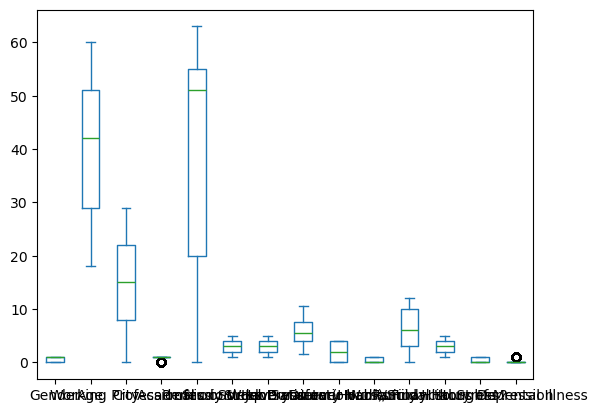

In [49]:
print(data.info())
#box plot
%matplotlib inline
data.plot.box()

In [50]:
# Correlation
corr = data.corr()
corr

,Gender,Age,City,Working Professional or Student,Profession,Academic or Work Pressure,Study or Job Satisfaction,Sleep Duration (Hours),Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
Gender,1.000000,-0.006890,-0.020220,-0.006657,0.011012,-0.004971,-0.009455,0.005437,0.038511,-0.010864,0.006957,-0.008019,-0.015499,0.008144
Age,-0.006890,1.000000,0.025305,0.584984,-0.335269,-0.099945,0.027576,0.050667,-0.071675,-0.141502,-0.118356,-0.083569,0.009409,-0.564671
City,-0.020220,0.025305,1.000000,0.012896,-0.006646,-0.008394,0.006008,-0.007983,0.004977,0.006455,-0.001257,-0.007537,0.008099,-0.020247
Working Professional or Student,-0.006657,0.584984,0.012896,1.000000,-0.422093,-0.040795,0.008387,0.022850,-0.052560,-0.137683,-0.116709,-0.053051,0.013070,-0.520790
Profession,0.011012,-0.335269,-0.006646,-0.422093,1.000000,0.031532,-0.011806,-0.020177,0.046580,0.071902,0.060108,0.035871,-0.006862,0.274515
Academic or Work Pressure,-0.004971,-0.099945,-0.008394,-0.040795,0.031532,1.000000,-0.051461,-0.026781,0.036276,0.093869,0.020453,0.051854,-0.000480,0.263402
Study or Job Satisfaction,-0.009455,0.027576,0.006008,0.008387,-0.011806,-0.051461,1.000000,0.014572,-0.026451,-0.061163,-0.031425,-0.036524,-0.010833,-0.142340
Sleep Duration (Hours),0.005437,0.050667,-0.007983,0.022850,-0.020177,-0.026781,0.014572,1.000000,-0.010069,-0.031523,-0.009667,0.005945,-0.004943,-0.079349
Dietary Habits,0.038511,-0.071675,0.004977,-0.052560,0.046580,0.036276,-0.026451,-0.010069,1.000000,0.065986,0.028319,0.043610,0.002211,0.148846
Have you ever had suicidal thoughts ?,-0.010864,-0.141502,0.006455,-0.137683,0.071902,0.093869,-0.061163,-0.031523,0.065986,1.000000,0.064541,0.087884,0.009289,0.349066


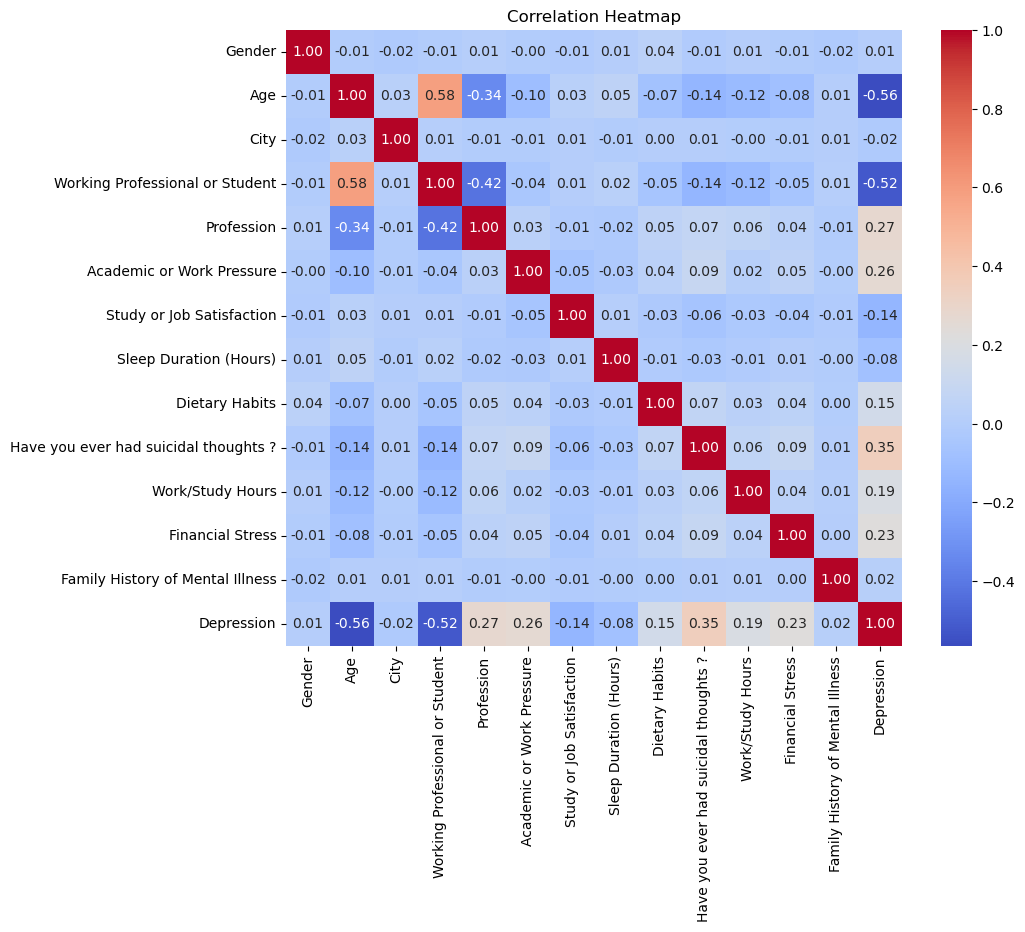

In [51]:
# Visualization - correlation with annotations
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title("Correlation Heatmap")
plt.show()

In [52]:
# Skewness
stat,p = shapiro(data.iloc[0:200,:])
print("Statistics =%.3f, p =%.3f" % (stat,p))

if p>0.05:
    print("Sample looks Gaussian (normal distribution)")
else:
    print("Sample does not look Gaussian")

Statistics =0.607, p =0.000
Sample does not look Gaussian


C:\Users\ginik\AppData\Local\Temp\ipykernel_14252\325548892.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data[data.Depression == 1][col], ax=axes[i], color='red', label='Depressed', fill=True)
C:\Users\ginik\AppData\Local\Temp\ipykernel_14252\325548892.py:11: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data[data.Depression == 0][col], ax=axes[i], color='blue', label='not Depression', fill=True)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


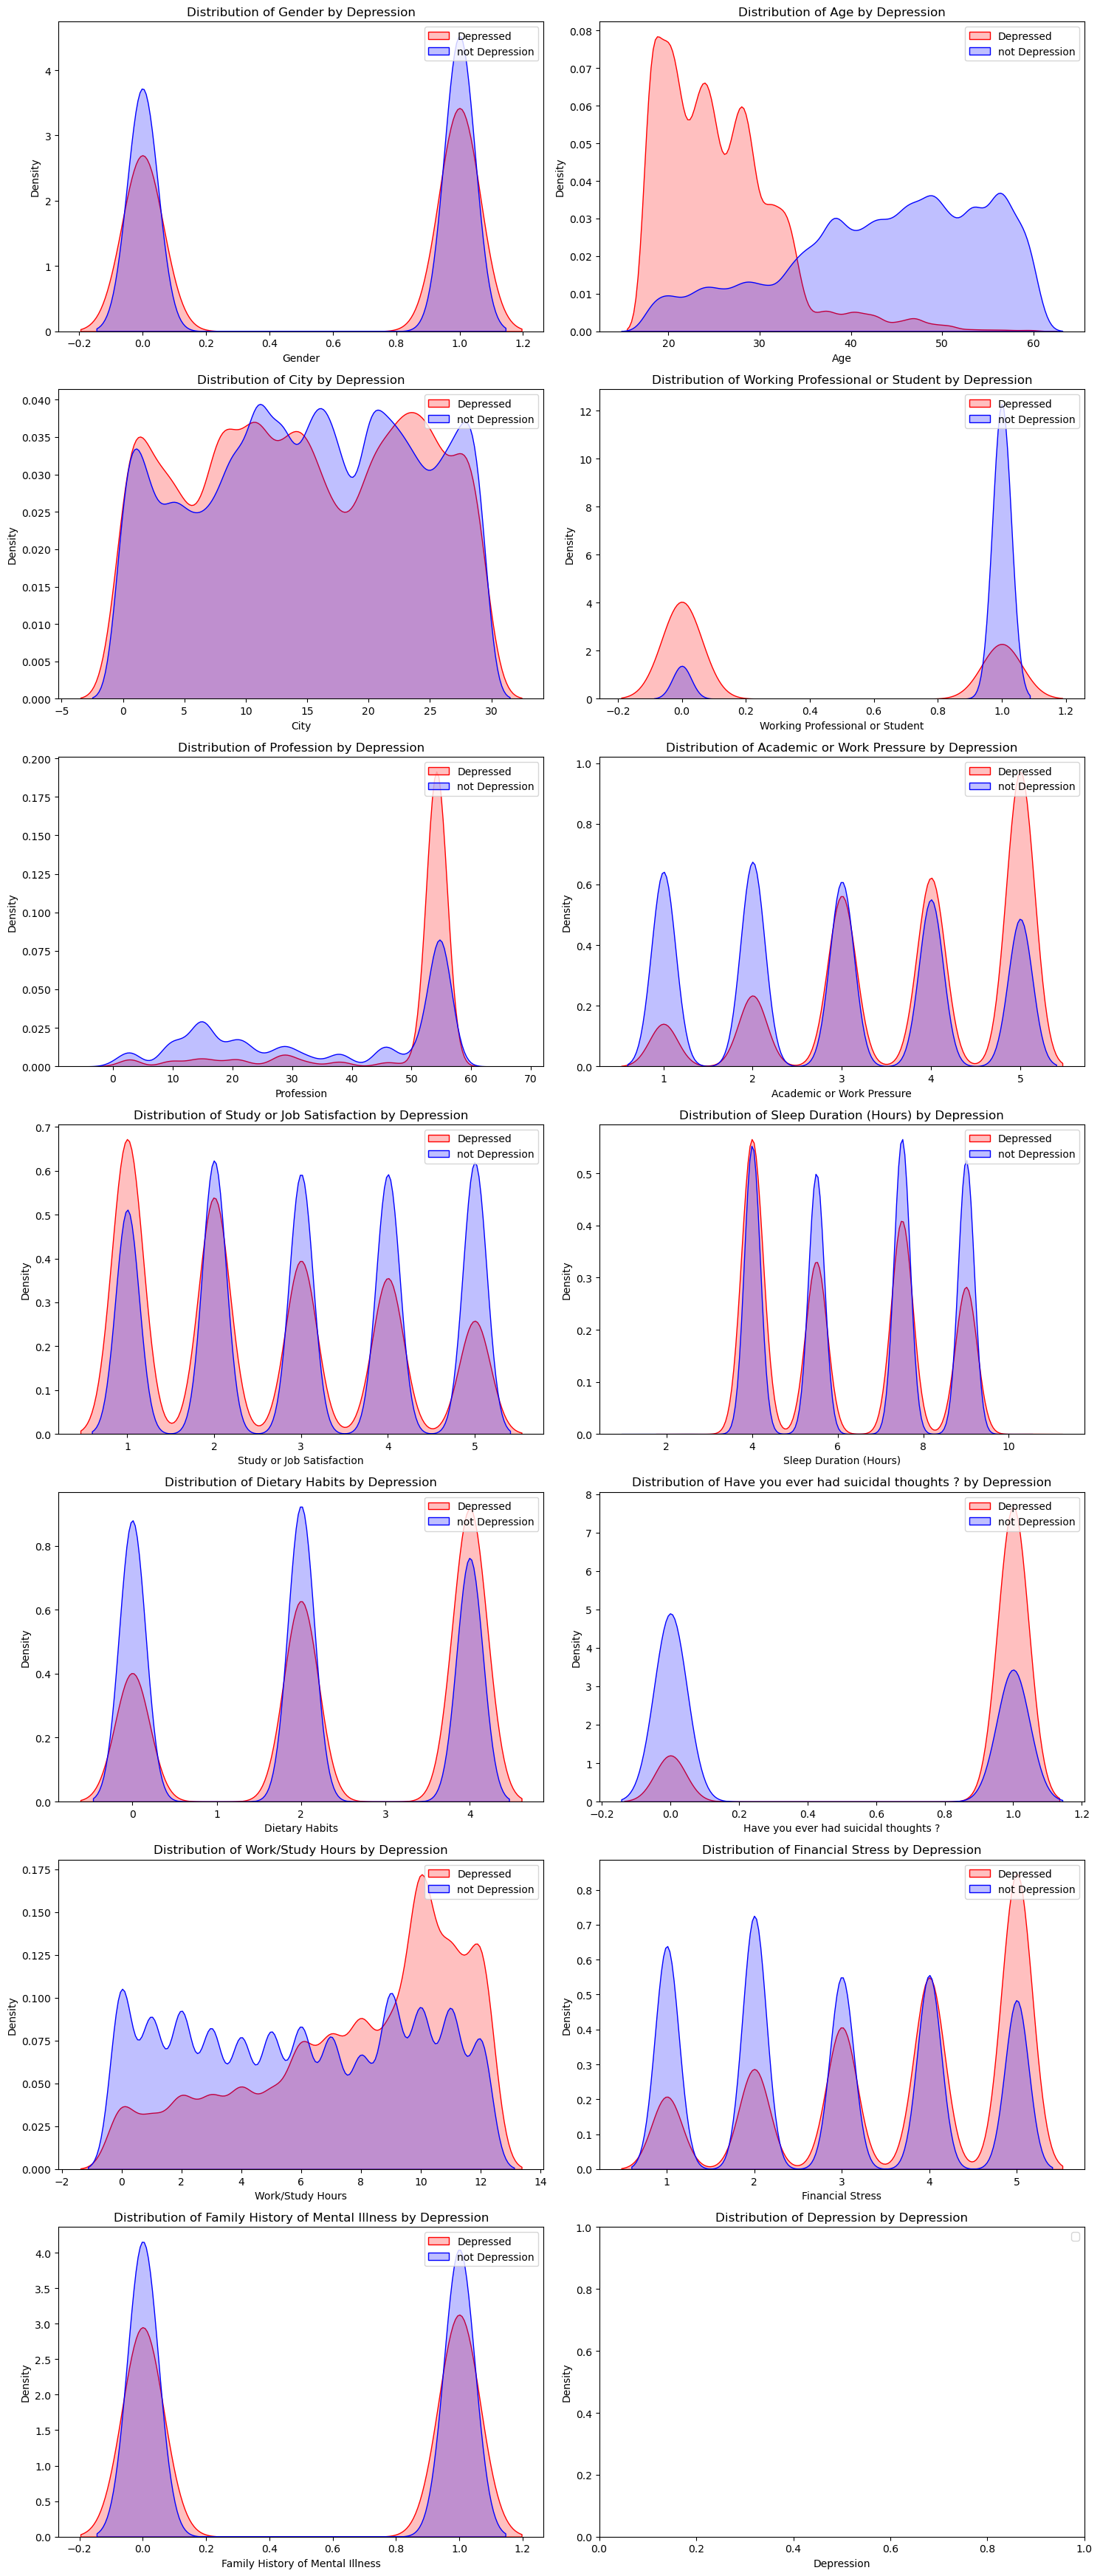

In [54]:
# Setup subplots 
# Set the number of columns for the grid
num_cols = 2
num_rows = (len(data.columns) + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()


for i, col in enumerate(data.columns):
    sns.kdeplot(data[data.Depression == 1][col], ax=axes[i], color='red', label='Depressed', fill=True)
    sns.kdeplot(data[data.Depression == 0][col], ax=axes[i], color='blue', label='not Depression', fill=True)
    axes[i].set_title(f'Distribution of {col} by Depression')
    axes[i].legend()

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [55]:
num_index=data.dtypes[data.dtypes!='object'].index

skew_feats=data[num_index].skew().sort_values(ascending=False)
skewness=pd.DataFrame({"Skew":skew_feats})
skewness

,Skew
Depression,1.650852
Study or Job Satisfaction,0.047594
Financial Stress,0.035653
Sleep Duration (Hours),0.024268
Have you ever had suicidal thoughts ?,0.022404
Family History of Mental Illness,0.011599
Academic or Work Pressure,-0.011850
Dietary Habits,-0.019101
City,-0.077884
Work/Study Hours,-0.128169


In [56]:
test

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93795,234495,Zoya,Female,49.0,Jaipur,Working Professional,Pilot,NaN,3.0,NaN,NaN,5.0,Less than 5 hours,Moderate,BSc,Yes,2.0,2.0,Yes
93796,234496,Shlok,Male,29.0,Ahmedabad,Working Professional,Pilot,NaN,5.0,NaN,NaN,1.0,7-8 hours,Moderate,BE,Yes,11.0,3.0,Yes
93797,234497,Rishi,Male,24.0,Visakhapatnam,Student,NaN,1.0,NaN,7.51,4.0,NaN,7-8 hours,Moderate,B.Tech,No,7.0,1.0,No
93798,234498,Eshita,Female,23.0,Kalyan,Working Professional,Marketing Manager,NaN,4.0,NaN,NaN,2.0,5-6 hours,Healthy,BA,Yes,7.0,5.0,Yes


### Base Models

In [58]:
# Imports
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from scipy.stats import randint, uniform, loguniform


In [59]:
# Split target and features
y = data['Depression']
X = data.drop(['Depression'], axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Applying SMOTE for imbalanced data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Standardize features (only for models sensitive to scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

In [60]:
# Define base models
logreg = LogisticRegression(max_iter=500, random_state=42, class_weight='balanced')
tree = DecisionTreeClassifier(random_state=42, class_weight='balanced')

In [61]:
# Combine models in a voting classifier
base_voting_clf = VotingClassifier(
    estimators=[
        ('logreg', logreg),
        ('tree', tree)
    ],
    voting='soft'
)
base_voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('logreg',
                              LogisticRegression(class_weight='balanced',
                                                 max_iter=500,
                                                 random_state=42)),
                             ('tree',
                              DecisionTreeClassifier(class_weight='balanced',
                                                     random_state=42))],
                 voting='soft')

In [62]:
y_pred = base_voting_clf.predict(X_test)

In [63]:
print("Classification Report for Base Voting Classifier:\n", classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred, pos_label=1):.2f}")

Classification Report for Base Voting Classifier:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94     23027
           1       0.74      0.71      0.73      5113

    accuracy                           0.90     28140
   macro avg       0.84      0.83      0.83     28140
weighted avg       0.90      0.90      0.90     28140

Accuracy: 0.90
F1 Score: 0.73


#### Hyperparameter Tuning the Models for better performance


In [65]:
# Subset for hyperparameter tuning
X_sample, _, y_sample, _ = train_test_split(
    X_train_scaled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

In [66]:
# Hyperparameter tuning for Decision Tree
param_dist_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'splitter': ['best', 'random']
}
random_search_tree = RandomizedSearchCV(
    estimator=tree, param_distributions=param_dist_tree, n_iter=30,
    scoring='accuracy', cv=3, verbose=1, n_jobs=-1, random_state=42
)
#best model
random_search_tree.fit(X_sample, y_sample)
best_tree = random_search_tree.best_estimator_

#best parameters and best score
print("Best Parameters:", random_search_tree.best_params_)
print("Best Cross-Validation Accuracy:", random_search_tree.best_score_)
best_tree

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 9, 'min_samples_split': 4, 'splitter': 'best'}
Best Cross-Validation Accuracy: 0.939349523984013


DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=15, min_samples_leaf=9, min_samples_split=4,
                       random_state=42)

In [67]:
# Hyperparameter tuning for Logistic Regression
param_dist_logreg = [
    {'penalty': ['l1'], 'C': loguniform(0.001, 100), 'solver': ['liblinear', 'saga'], 'max_iter': [200, 500]},
    {'penalty': ['l2'], 'C': loguniform(0.001, 100), 'solver': ['liblinear', 'lbfgs', 'saga'], 'max_iter': [200, 500]},
    {'penalty': ['elasticnet'], 'C': loguniform(0.001, 100), 'solver': ['saga'], 'l1_ratio': [0.2, 0.5, 0.7]},
    {'penalty': [None], 'solver': ['lbfgs', 'saga'], 'max_iter': [200, 500]}
]
random_search_logreg = RandomizedSearchCV(
    estimator=logreg, param_distributions=param_dist_logreg, n_iter=30,
    scoring='accuracy', cv=3, verbose=1, n_jobs=-1, random_state=42
)
random_search_logreg.fit(X_sample, y_sample)

# Get the best model found by RandomizedSearchCV
best_logreg = random_search_logreg.best_estimator_
print(f"Best parameters: {random_search_logreg.best_params_}")
print(f"Best Cross-Validation Accuracy: {random_search_logreg.best_score_}")
best_logreg

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best parameters: {'C': 0.022737628102536857, 'max_iter': 200, 'penalty': 'l1', 'solver': 'saga'}
Best Cross-Validation Accuracy: 0.9212995948944487


LogisticRegression(C=0.022737628102536857, class_weight='balanced',
                   max_iter=200, penalty='l1', random_state=42, solver='saga')

In [68]:
# Optimized VotingClassifier
base_voting_clf_tuned = VotingClassifier(
    estimators=[
        ('logreg', best_logreg),
        ('tree', best_tree),
    ],
    voting='soft', n_jobs=-1
)
base_voting_clf_tuned.fit(X_train_scaled, y_resampled)

VotingClassifier(estimators=[('logreg',
                              LogisticRegression(C=0.022737628102536857,
                                                 class_weight='balanced',
                                                 max_iter=200, penalty='l1',
                                                 random_state=42,
                                                 solver='saga')),
                             ('tree',
                              DecisionTreeClassifier(class_weight='balanced',
                                                     criterion='entropy',
                                                     max_depth=15,
                                                     min_samples_leaf=9,
                                                     min_samples_split=4,
                                                     random_state=42))],
                 n_jobs=-1, voting='soft')

In [69]:
y_pred_tuned = base_voting_clf_tuned.predict(X_test_scaled)

In [70]:
# Evaluation
print("Base Models Tuned Voting Classifier Report:\n", classification_report(y_test, y_pred_tuned))
print(f"Accuracy: {accuracy_score(y_test, y_pred_tuned):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_tuned, pos_label=1):.2f}")

Base Models Tuned Voting Classifier Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95     23027
           1       0.76      0.87      0.81      5113

    accuracy                           0.93     28140
   macro avg       0.87      0.90      0.88     28140
weighted avg       0.93      0.93      0.93     28140

Accuracy: 0.93
F1 Score: 0.81


### Main ML Algorithms

In [72]:
#%pip install lightgbm

In [73]:
#%pip install xgboost

In [74]:
from lightgbm import LGBMClassifier 
import xgboost as xgb

In [75]:
gb_model = GradientBoostingClassifier(random_state=42)
xgb_model = xgb.XGBClassifier(random_state=42)
lgbm_model = LGBMClassifier(random_state=42)

In [76]:
# Soft Voting Classifier with all models
main_voting_clf_soft = VotingClassifier( 
    estimators=[ 
        ('gb', gb_model), ('xgb', xgb_model), ('lgb', lgbm_model) 
    ], 
    voting='soft' 
) 

# Fit the model 
main_voting_clf_soft.fit(X_train, y_train) 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 20454, number of negative: 92106
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022097 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 173
[LightGBM] [Info] Number of data points in the train set: 112560, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181716 -> initscore=-1.504762
[LightGBM] [Info] Start training from score -1.504762


VotingClassifier(estimators=[('gb',
                              GradientBoostingClassifier(random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('lgb', LGBMClassifier(random_state=42))],
                 voting='soft')

In [77]:
main_y_pred_soft = main_voting_clf_soft.predict(X_test) 

In [78]:
# Evaluate the model 
print("Classification Report for Voting Classifier with All  Main Models:") 
print(classification_report(y_test, main_y_pred_soft)) 
# Accuracy 
print("Accuracy:", accuracy_score(y_test,main_y_pred_soft))
print(f"F1 Score: {f1_score(y_test, main_y_pred_soft, pos_label=1):.2f}")

Classification Report for Voting Classifier with All  Main Models:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     23027
           1       0.84      0.81      0.83      5113

    accuracy                           0.94     28140
   macro avg       0.90      0.89      0.89     28140
weighted avg       0.94      0.94      0.94     28140

Accuracy: 0.9384506041222459
F1 Score: 0.83


In [80]:
# Hyperparameter tuning for Gradient Boosting
gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 1.0],
    'max_depth': [1, 2, 3],
    'subsample': [0.8]
}
gb_grid = RandomizedSearchCV(
    gb_model, gb_params, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1
)
gb_grid.fit(X_sample, y_sample)

#best model
best_gb = gb_grid.best_estimator_

print(f"Best parameters: {gb_grid.best_params_}")
print(f"Best Cross-Validation Accuracy: {gb_grid.best_score_}")
best_gb

Best parameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 2, 'learning_rate': 1.0}
Best Cross-Validation Accuracy: 0.9612808680471385


GradientBoostingClassifier(learning_rate=1.0, max_depth=2, n_estimators=200,
                           random_state=42, subsample=0.8)

In [81]:
# Hyperparameter tuning for XGBoost
xgb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8],
    'colsample_bytree': [0.8]
}
xgb_grid = RandomizedSearchCV(
    xgb_model, xgb_params, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1
)
xgb_grid.fit(X_sample, y_sample)

#best model
best_xgb = xgb_grid.best_estimator_

print(f"Best parameters: {xgb_grid.best_params_}")
print(f"Best Cross-Validation Accuracy: {xgb_grid.best_score_}")
best_xgb

Best parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Best Cross-Validation Accuracy: 0.9610637240630144


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [82]:
# Hyperparameter tuning for LightGBM
lgbm_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [31, 50, 100],
    'boosting_type': ['gbdt', 'dart'],
    'feature_fraction': [0.8, 1.0]
}
lgbm_grid = RandomizedSearchCV(
    lgbm_model, lgbm_params, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1
)
lgbm_grid.fit(X_sample, y_sample)

#best model
best_lgbm = lgbm_grid.best_estimator_

print(f"Best parameters: {lgbm_grid.best_params_}")
print(f"Best Cross-Validation Accuracy: {lgbm_grid.best_score_}")
best_lgbm

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Info] Number of positive: 73685, number of negative: 73684
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012016 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1635
[LightGBM] [Info] Number of data points in the train set: 147369, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500003 -> initscore=0.000014
[LightGBM] [Info] Start training from score 0.000014
Best parameters: {'num_leaves': 100, 'n_estimators': 100, 'learning_rate': 0.1, 'feature_fraction': 0.8, 'boosting_type': 'gbdt'}
Best Cross-Validation Accuracy: 0.9615997980363937


LGBMClassifier(feature_fraction=0.8, num_leaves=100, random_state=42)

In [83]:
# Soft Voting Classifier with all models
main_voting_clf_tuned_soft = VotingClassifier( 
    estimators=[ 
        ('gb', best_gb), ('xgb', best_xgb),  ('lgbm', best_lgbm) 
    ], 
    voting='soft' , n_jobs=1
) 

# Fit the model 
main_voting_clf_tuned_soft.fit(X_train, y_train) 

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Info] Number of positive: 20454, number of negative: 92106
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002689 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 173
[LightGBM] [Info] Number of data points in the train set: 112560, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181716 -> initscore=-1.504762
[LightGBM] [Info] Start training from score -1.504762


VotingClassifier(estimators=[('gb',
                              GradientBoostingClassifier(learning_rate=1.0,
                                                         max_depth=2,
                                                         n_estimators=200,
                                                         random_state=42,
                                                         subsample=0.8)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=No...
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=300, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('lgbm',
                              LGBMClassifier(feature_fraction=0.8,
                                             num_leaves=100,
                                             random_state=42))],
                 n_jobs=1, voting='soft')

In [84]:
main_y_pred_soft_tuned = main_voting_clf_tuned_soft.predict(X_test) 

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8


In [85]:
# Evaluate the model 
print("Classification Report for Voting Classifier with All Tuned Models:") 
print(classification_report(y_test, main_y_pred_soft_tuned)) 
# Accuracy 
print(f"Accuracy: {accuracy_score(y_test,main_y_pred_soft_tuned):.2f}")
print(f"F1 Score: {f1_score(y_test, main_y_pred_soft_tuned, pos_label=1):.2f}")

Classification Report for Voting Classifier with All Tuned Models:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     23027
           1       0.85      0.81      0.83      5113

    accuracy                           0.94     28140
   macro avg       0.90      0.89      0.90     28140
weighted avg       0.94      0.94      0.94     28140

Accuracy: 0.94
F1 Score: 0.83


In [86]:
# Feature Importance for Tree-Based Models
print("\nRandom Forest Feature Importances:", best_lgbm.feature_importances_)
print("Gradient Boosting Feature Importances:", best_gb.feature_importances_)


Random Forest Feature Importances: [ 179 1504  778  167  804 1176 1134  819  530  268 1208 1200  133]
Gradient Boosting Feature Importances: [2.24801200e-03 7.36569173e-01 4.00730003e-04 2.39079289e-02
 7.27699594e-04 1.03636183e-01 2.87249723e-02 4.55679136e-03
 4.15195633e-03 5.62731280e-02 8.64007690e-03 3.01252603e-02
 3.80884367e-05]


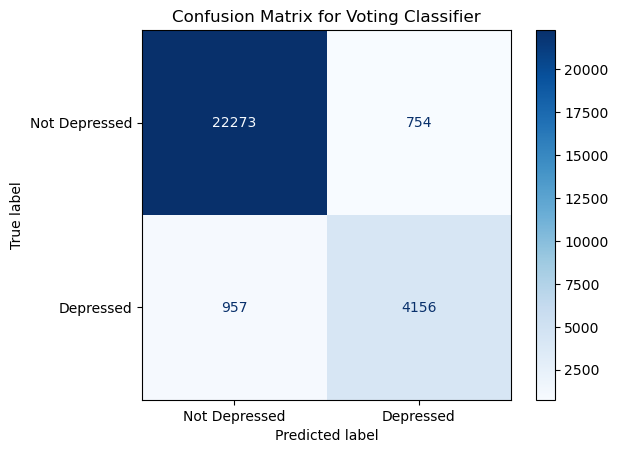

In [87]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Generate the confusion matrix
cm = confusion_matrix(y_test, main_y_pred_soft_tuned)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Depressed', 'Depressed'],)
disp.plot(cmap=plt.cm.Blues)  # You can choose other color maps as well
plt.title('Confusion Matrix for Voting Classifier')
plt.show()

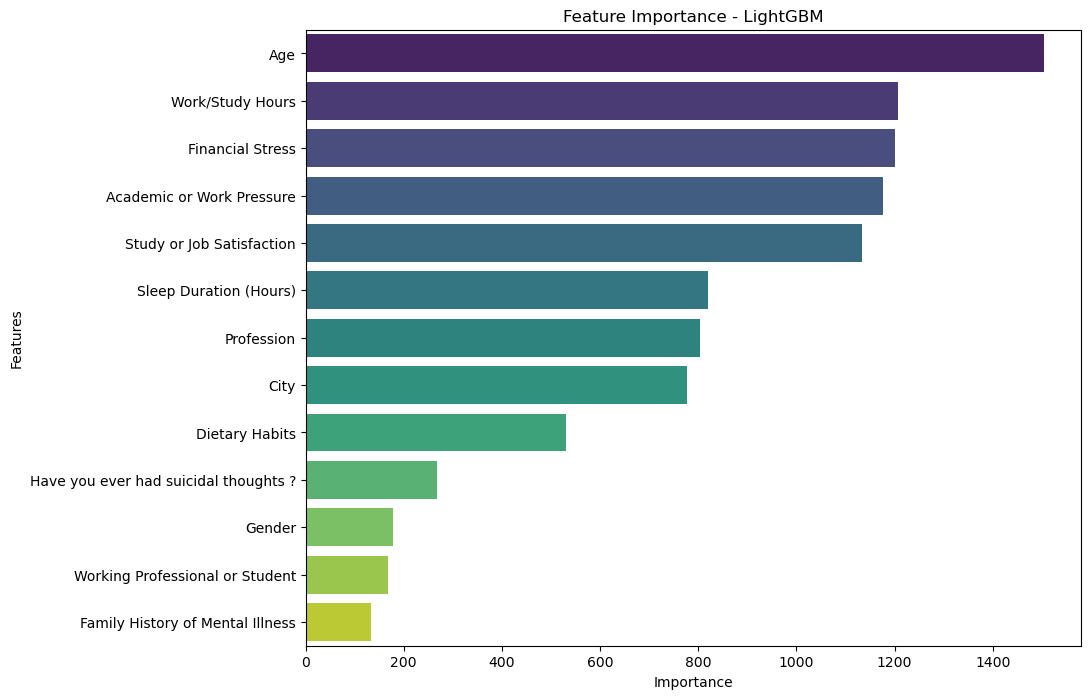

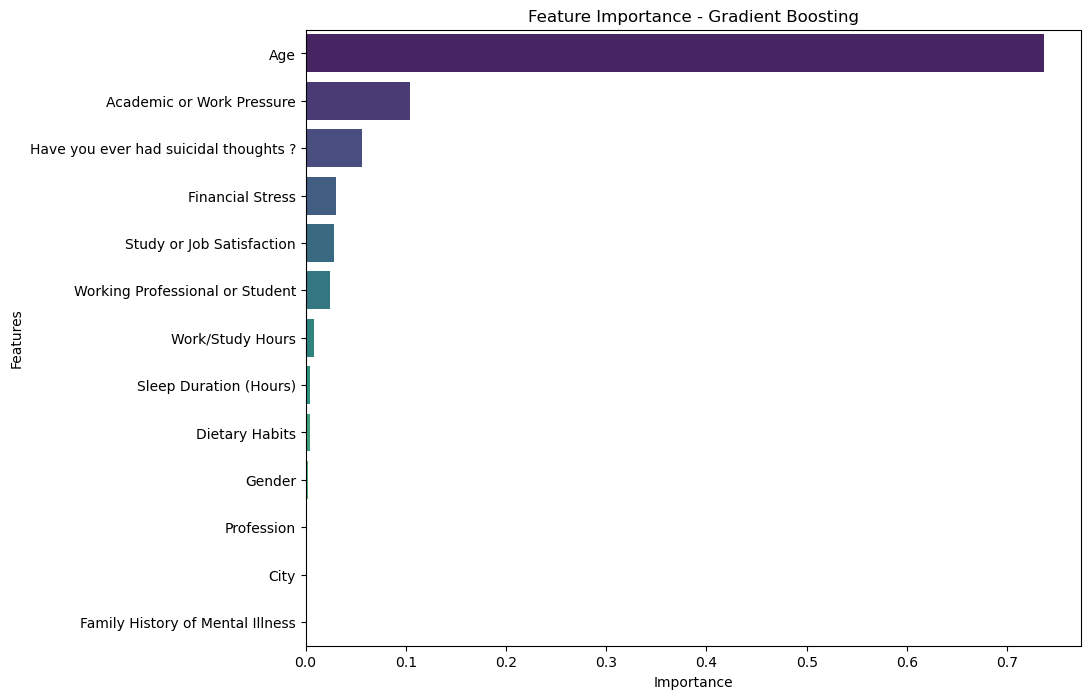

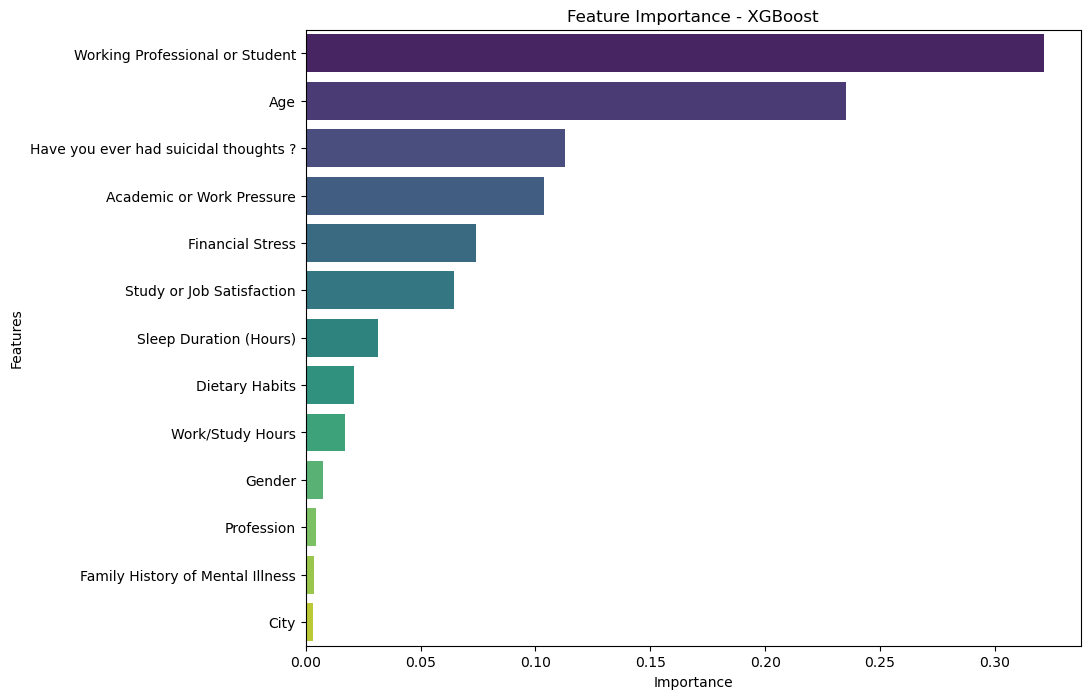

In [89]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def plot_feature_importance(model, model_name, feature_names):
    # Get feature importance
    importance = model.feature_importances_
    #DataFrame for easy plotting
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance
    })

    # Sort the DataFrame by importance
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Plot feature importance
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis',hue='Feature',legend=False,)
    plt.title(f'Feature Importance - {model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.show()

#plot for LightGBM, Gradient Boosting, and XGBoost
plot_feature_importance(best_lgbm, "LightGBM", X_train.columns)
plot_feature_importance(best_gb, "Gradient Boosting", X_train.columns)
plot_feature_importance(best_xgb, "XGBoost", X_train.columns)

In [129]:
test_data = pd.read_csv('test_clean.csv')

In [133]:
test_id = test_data['id']

In [135]:
test_id

0        140700
1        140701
2        140702
3        140703
4        140704
          ...  
93795    234495
93796    234496
93797    234497
93798    234498
93799    234499
Name: id, Length: 93800, dtype: int64

In [137]:
test_data = test_data.drop('id', axis = 1)

In [139]:
test_data

,Gender,Age,City,Working Professional or Student,Profession,Academic or Work Pressure,Study or Job Satisfaction,Sleep Duration (Hours),Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,1,53.0,29,1,27,2.0,5.0,4.0,2,0,9.0,3.0,1
1,0,58.0,13,1,19,2.0,4.0,4.0,2,0,6.0,4.0,0
2,1,53.0,10,1,56,4.0,1.0,7.5,2,1,12.0,4.0,0
3,0,23.0,22,0,53,5.0,1.0,9.0,2,1,10.0,4.0,0
4,1,47.0,11,1,56,5.0,5.0,7.5,2,1,3.0,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93795,0,49.0,10,1,44,3.0,5.0,4.0,2,1,2.0,2.0,1
93796,1,29.0,1,1,44,5.0,1.0,7.5,2,1,11.0,3.0,1
93797,1,24.0,29,0,53,1.0,4.0,7.5,2,0,7.0,1.0,0
93798,0,23.0,11,1,38,4.0,2.0,5.5,0,1,7.0,5.0,1


In [125]:
#predicting target variable for test data

In [141]:
test_predicted = main_voting_clf_tuned_soft.predict(test_data) 

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8


In [143]:
test_predicted

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [145]:
depression = test_predicted

In [149]:
test_predictions = pd.DataFrame({'id': test_id, 'Depression': depression})

In [151]:
test_predictions

,id,Depression
0,140700,0
1,140701,0
2,140702,0
3,140703,1
4,140704,0
...,...,...
93795,234495,0
93796,234496,1
93797,234497,0
93798,234498,1


In [155]:
test_predictions['Depression'].value_counts()

Depression
0    78133
1    15667
Name: count, dtype: int64

In [157]:
test_predictions.to_csv('test_predictions.csv', index=False)